### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Define the KNN class



Calculate the Euclidean distance: Implement a function to calculate the Euclidean distance between two data points. The Euclidean distance formula computes the distance between two points in a multidimensional space.

In [2]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))



Find the K nearest neighbors: Given a test data point, calculate the distance between the test point and all the training data points. Select the K data points with the shortest distances.

Make predictions: Based on the K nearest neighbors, determine the majority class or the most common class label among the K neighbors. Assign this class label as the predicted label for the test data point.

In [3]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        y_pred = [self._predict(x) for x in x_test]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.x_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = np.argmax(np.bincount(k_nearest_labels))
        return most_common

In [4]:
# Load the Titanic dataset
titanic_df = pd.read_csv('/content/train.csv')


 Preprocess the data by dropping unnecessary columns and rows with missing values, and convert categorical variables into numerical format.

In [5]:
# Drop unnecessary columns
titanic_df.drop(["Name", "Ticket", "Cabin", "Embarked","PassengerId","SibSp","Parch"], axis=1, inplace=True)

# Drop rows with missing values
titanic_df.dropna(inplace=True)

# Convert categorical variables into numerical
titanic_df["Sex"] = titanic_df["Sex"].map({"female": 0, "male": 1})

In [6]:
titanic_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


Splitting up the labels and features into training and testing sets.we normalize the features and split the dataset into training and testing sets.

In [7]:
# Split the dataset into features (x) and output (y)
x = titanic_df.drop("Survived", axis=1).values
y = titanic_df["Survived"].values

# Normalize the features
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

# Split the dataset into training and testing sets
train_size = int(0.8 * len(x))
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


We create an instance of the KNN class, set k (the number of nearest neighbors) to 3, and fit the training data. Then, we make predictions for the test data and evaluate the accuracy of the model.

In [8]:
# Create a KNN classifier and fit the training data
knn = KNN(k=3)
knn.fit(x_train, y_train)

# Predict the output for the testing set
y_pred = knn.predict(x_test)

Evaluate the algorithm Useing evaluation metrics such as accuracy to assess the performance of the KNN algorithm on the test data.

In [9]:
# Evaluate the accuracy of the model
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8321678321678322


Visualize the results: Utilize visualization techniques to plot the training data, test data, and predicted labels to gain insights into the algorithm's performance and decision boundaries.

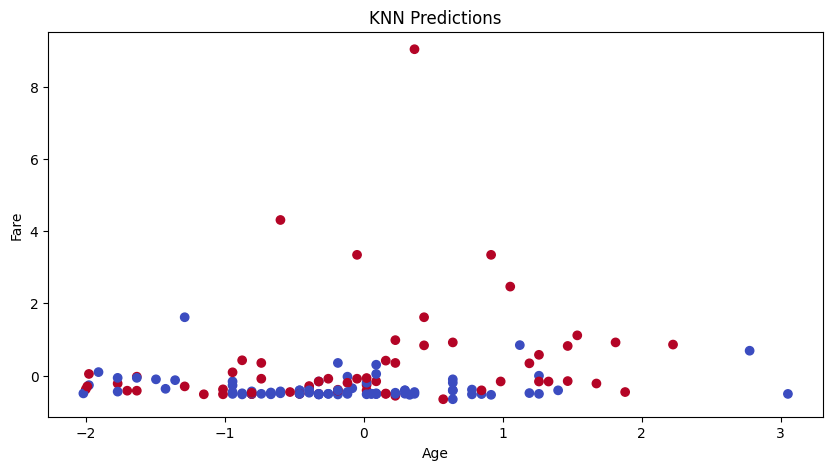

In [10]:
# Visualize the results
plt.figure(figsize=(10, 5))
plt.scatter(x_test[:, 2], x_test[:, 3], c=y_pred, cmap="coolwarm")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("KNN Predictions")
plt.show()


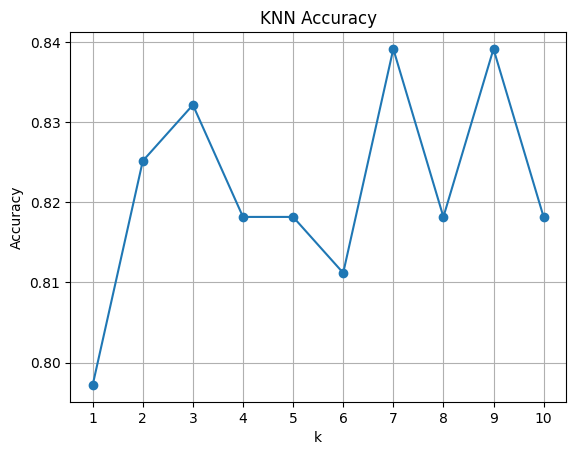

In [11]:
# Vary the value of k
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn.k = k
    y_pred = knn.predict(x_test)
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    accuracies.append(accuracy)

# Plot the accuracy values
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()